<a href="https://colab.research.google.com/github/mkjubran/MachineLearningNotebooks/blob/master/eSCO_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

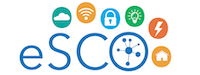 | 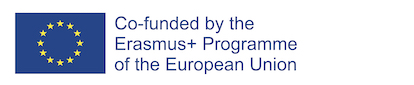
--- | ---


-----

<h1><center><font size="2.5"> The European Commission support for the production of this publication does not constitute an endorsement of the contents which reflects the views only of the authors, and the Commission cannot be held responsible for any use which may be made of the information contained therein.
</center></h1>

-----

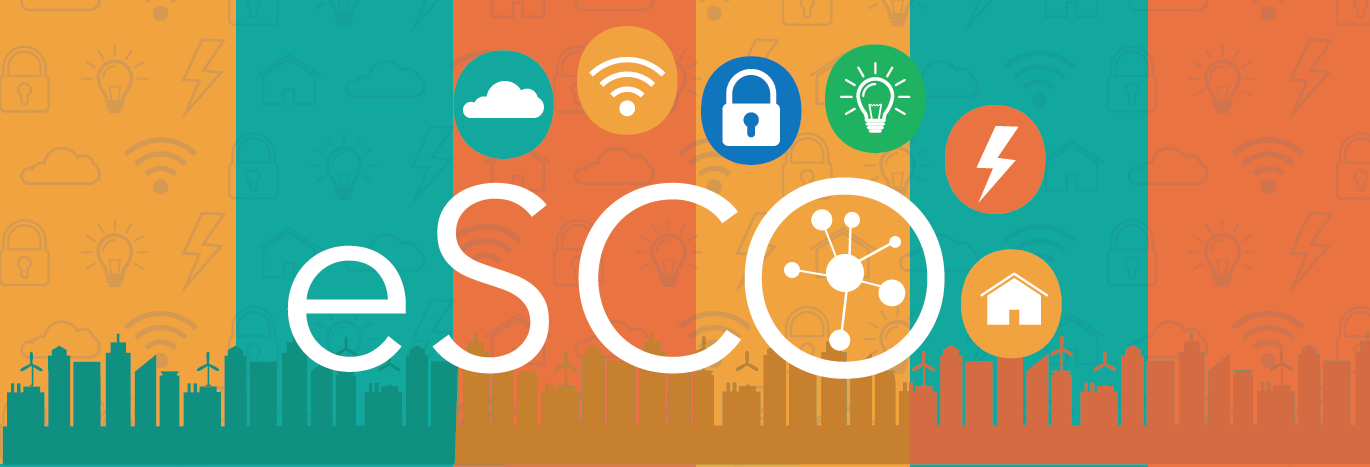

<h1><center><font size="10"> Tutorial: Neural Network
</center></h1>

# Clone the Source GitHub Reporsitory 
We need to clone some source files to be used throughout this tutorial from a GitHub repository

In [ ]:
!rm -rf ./MachineLearning
!git clone https://github.com/mkjubran/MachineLearning.git

# Neural Network (NN)

**Readings and Resources**

[1] 

[2]


# Case #1: Studying Hours and Passing Exams

In this section we will use **Neural Network** (NN) to infer whether a student will pass or fail an exam based on the number of hours the student spends preparing for the exam. A dataset for few students that includes the number of study hours and whether they pass (1) or fail (0) the exam. This is a binary classification problem that can be solved using **NN** as will be shown next.

**Implementation**

Read the input data (number of study hours and exam pass or fail) from the csv file (HoursPassExam.csv) file. Use the pandas library (https://pandas.pydata.org/) to read the data from the file.

In [ ]:
import pandas as pd
df = pd.read_csv("./MachineLearning/6_naive_bayes/HoursPassExam.csv")
df.head()

To get some information about the read dataset including parameters and type of fields and features use the pandas info method

In [ ]:
df.info()

To view the dataset, we will use the scatter plot from matplotlib library as

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['hours'],df['pass'],color = 'red', marker = '+')

As can be seen, the output (y) is binary; 0 for failing the exam and 1 for passing the exam. Also, the chances of passing the exam increases when the number of studying hours for the exam increases. Let us divide the dataset into training and testing datasets.

In [ ]:
from sklearn.model_selection import train_test_split
x = df[['hours']]
y = df['pass']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

Next we will train the **NN** model and compute its accuracy

In [ ]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier()
model_nn.fit(x_train,y_train)
ACC_train_nn = model_nn.score(x_train,y_train)
ACC_test_nn = model_nn.score(x_test,y_test)
print(ACC_train_nn)
print(ACC_test_nn)

Let us try to compare **NN** with the other ML techqniues

In [ ]:
## logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)

## Decision Trees
from sklearn.tree import DecisionTreeClassifier 
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
ACC_train_dt = model_dt.score(x_train, y_train)
ACC_test_dt = model_dt.score(x_test, y_test)

## Support Vector Machine
from sklearn.svm import SVC 
model_svm = SVC()
model_svm.fit(x_train, y_train)
ACC_train_svm = model_svm.score(x_train, y_train)
ACC_test_svm = model_svm.score(x_test, y_test)

## Ranom Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)

## Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
ACC_train_nb = model_nb.score(x_train,y_train)
ACC_test_nb = model_nb.score(x_test,y_test)

from prettytable import PrettyTable
t = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)' , 'NB (%)','NN (%)'])
t.add_row(['Training', ACC_train_lr*100, ACC_train_dt*100, ACC_train_svm*100, ACC_train_rf*100 , ACC_train_nb*100, ACC_train_nn*100])
t.add_row(['Testing', ACC_test_lr*100, ACC_test_dt*100, ACC_test_svm*100, ACC_test_rf*100 , ACC_test_nb*100, ACC_train_nn*100])
print(t)

# Case #2: HR Analysis

In this section, we will analyze the data of employees of a company. This data includes some information about the employees who are working at the company and those who left the company. Our objective is to predict whether an existing employee would leave the company based on his/her current status. This will help us decide to offer the employee some incentives to keep him/her in the company. This could also be used to plan early to hire new employees. We will try to solve this problem using **Neural Network** (NN).

**Implementation**

Read the input data from the csv file (HR_comma_sep.csv) file. Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics. Use the pandas library (https://pandas.pydata.org/) to read the data from the file.

In [ ]:
import pandas as pd
HR = pd.read_csv('./MachineLearning/6_naive_bayes/HR_comma_sep.csv')
HR.head()

To get some information about the read dataset use the pandas info method

In [ ]:
HR.info()

Before applying classification to the data, we will explore and analyze the data to determine the features that influence the decision of the employee to remain or leave the company.

In [ ]:
left = HR[HR.left==1] ## employees who left the company 
No_left= left.shape[0]
remain = HR[HR.left==0] ## employees who remain at the company 
No_remain = remain.shape[0]
Per_left = No_left / (No_left + No_remain)

print('No_left = {}, No_remain = {} , Percentage of left = {} %'.format(No_left,No_remain,Per_left*100))


About $23\%$ employees left the company. Now, let us check which features are mostly affecting the decision of employees to leave or remain in the company. To do this, we will measure the average of each numeric feature for employees to remain or leave the company.  

In [ ]:
HR.groupby('left').mean() #

We may conclude the following from the table above: \\
1- Employees who remain in the company has higher satisfaction_level and thus it is a good indicator for our regression/classifier (good feature) \\
2- The last_evaluation, number of projects, and time_spend_company scores are almost independent of the employees remain or leave the company \\
3- The average_montly_hours for employees who left the company are higher than those who remained which could be an indicator (good feature) \\
4- The promotion_last_5years feature of employees remaining in the company is much higher than those left the company (good feature) \\
5- Work_accident is also an indicator so it is a good feature.




Let us also check the quality of the categories' features.

In [ ]:
pd.crosstab(HR.salary,HR.left)

The salary table shows that emloyees with high salaries are more likely to stay in the company. So it is a good feature. To visualize this we make a bar plot as follows:

In [ ]:
pd.crosstab(HR.salary,HR.left).plot(kind='bar')

We need also to investigate the department feature as follows

In [ ]:
pd.crosstab(HR.Department,HR.left).plot(kind='bar')

The department type has a minor effect on the decision of employees to stay or leave the company. It doesn't look a major factor and thus we will ignore this feature. 

Based on the above analysis, we will create the following table which includes only the good (important, major) features affecting employees decisions to stay or leave the company

In [ ]:
HR_GF = HR[['left','satisfaction_level','average_montly_hours','Work_accident','promotion_last_5years', 'salary']]
HR_GF.head()

Let us plot this data for better visualization

In [ ]:
import matplotlib.pyplot as plt
HR_GF_0 = HR_GF[HR_GF['left'] == 0]
HR_GF_1 = HR_GF[HR_GF['left'] == 1]

fig, axes = plt.subplots(2, 4,figsize = (20,10))
axes[0,0].scatter(HR_GF_0['satisfaction_level'], HR_GF_0['average_montly_hours'], color = 'blue', marker ='+')
axes[0,0].set_xlabel('satisfaction_level')
axes[0,0].set_ylabel('average_montly_hours')

axes[0,1].scatter(HR_GF_0['satisfaction_level'], HR_GF_0['Work_accident'], color = 'blue', marker ='+')
axes[0,1].set_xlabel('satisfaction_level')
axes[0,1].set_ylabel('Work_accident')

axes[0,2].scatter(HR_GF_0['satisfaction_level'], HR_GF_0['promotion_last_5years'], color = 'blue', marker ='+')
axes[0,2].set_xlabel('satisfaction_level')
axes[0,2].set_ylabel('promotion_last_5years')

axes[0,3].scatter(HR_GF_0['satisfaction_level'], HR_GF_0['salary'], color = 'blue', marker ='+')
axes[0,3].set_xlabel('satisfaction_level')
axes[0,3].set_ylabel('salary')

axes[1,0].scatter(HR_GF_1['satisfaction_level'], HR_GF_1['average_montly_hours'], color = 'orange', marker ='s')
axes[1,0].set_xlabel('satisfaction_level')
axes[1,0].set_ylabel('average_montly_hours')

axes[1,1].scatter(HR_GF_1['satisfaction_level'], HR_GF_1['Work_accident'], color = 'orange', marker ='s')
axes[1,1].set_xlabel('satisfaction_level')
axes[1,1].set_ylabel('Work_accident')

axes[1,2].scatter(HR_GF_1['satisfaction_level'], HR_GF_1['promotion_last_5years'], color = 'orange', marker ='s')
axes[1,2].set_xlabel('satisfaction_level')
axes[1,2].set_ylabel('promotion_last_5years')

axes[1,3].scatter(HR_GF_1['satisfaction_level'], HR_GF_1['salary'], color = 'orange', marker ='s')
axes[1,3].set_xlabel('satisfaction_level')
axes[1,3].set_ylabel('salary')

By comparing the top and bottom figures, the dataset is separable with respect to the left feature.

**For the NN** there is no need to apply one hot coding for categories features. However, we will need to convert them to numbers. We will use label encoder from sklearn library to encode the category feature (salary) as follows

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_salary = LabelEncoder()
HR_GF_LE = pd.DataFrame.copy(HR_GF)
HR_GF_LE['salary'] = le_salary.fit_transform(HR_GF_LE['salary'])
HR_GF_LE.head()

Let us define input (x) and output (y) of the model

In [ ]:
x = HR_GF_LE.drop('left',axis=1)
y = HR_GF_LE.left

Before classification, we need to split the datset into test and training parts

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

Now, we are ready to apply **NN**

In [ ]:
from sklearn.neural_network import MLPClassifier
HR_nn = MLPClassifier()
HR_nn.fit(x_train,y_train)
ACC_train_nn = HR_nn.score(x_train,y_train)
ACC_test_nn = HR_nn.score(x_test,y_test)
print(ACC_train_nn)
print(ACC_test_nn)

Let us try to compare **NN** with the other ML techqniues


In [ ]:
## add column for logitic regression (training)
dm = pd.get_dummies(x_train.salary)
x_train_lr = pd.concat([x_train,dm],axis=1)
x_train_lr = x_train_lr.drop(['salary',2],axis=1)
## add column for logitic regression (testing)
dm = pd.get_dummies(x_test.salary)
x_test_lr = pd.concat([x_test,dm],axis=1)
x_test_lr = x_test_lr.drop(['salary',2],axis=1)

## logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train_lr, y_train)
ACC_train_lr = model_lr.score(x_train_lr, y_train)
ACC_test_lr = model_lr.score(x_test_lr, y_test)

## Decision Trees
from sklearn.tree import DecisionTreeClassifier 
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
ACC_train_dt = model_dt.score(x_train, y_train)
ACC_test_dt = model_dt.score(x_test, y_test)

## Support Vector Machine
from sklearn.svm import SVC 
model_svm = SVC()
model_svm.fit(x_train, y_train)
ACC_train_svm = model_svm.score(x_train, y_train)
ACC_test_svm = model_svm.score(x_test, y_test)

## Random Forest
from sklearn import ensemble
HR_rf = ensemble.RandomForestClassifier()
HR_rf.fit(x_train,y_train)
ACC_train_rf = HR_rf.score(x_train,y_train)
ACC_test_rf = HR_rf.score(x_test,y_test)

## Naive Bayes
from sklearn.naive_bayes import GaussianNB
HR_nb = GaussianNB()
HR_nb.fit(x_train,y_train)
ACC_train_nb = HR_nb.score(x_train,y_train)
ACC_test_nb = HR_nb.score(x_test,y_test)

## Neural Network
from sklearn.neural_network import MLPClassifier
HR_nn = MLPClassifier()
HR_nn.fit(x_train,y_train)
ACC_train_nn = HR_nn.score(x_train,y_train)
ACC_test_nn = HR_nn.score(x_test,y_test)

from prettytable import PrettyTable
t = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)','NB (%)', 'NN (%)'])
t.add_row(['Training', ACC_train_lr*100, ACC_train_dt*100, ACC_train_svm*100, ACC_train_rf*100, ACC_train_nb*100, ACC_train_nn*100])
t.add_row(['Testing', ACC_test_lr*100, ACC_test_dt*100, ACC_test_svm*100, ACC_test_rf*100,ACC_test_nb*100,ACC_test_nn*100])
print(t)

**Comment on the traning and testing accuracies in the table above?**

# Case #3: Recognition of Handwritten Digits

In this section, we will try to recognize handwritten digits using **Neural Network** (NN). We will be using a standard dataset available through the sklearn library called "load_digits".$^{[1][2]}$

[1] https://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction

[2] https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html


In the beginning, we will load the dataset as follows

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

A dataset is a dictionary-like object that holds all the data and some metadata about the data. Let us explore the content of the digits dataset

In [ ]:
dir(digits)

The digits.data contains the features that will be used to classify the digits samples

In [ ]:
print(digits.data)

The digits.images contains the images of the digits samples. They can be viewed using the following code

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])

The ground truth of the datset is stored in the digits.taget

In [ ]:
print(digits.target)

Let us use Principle Component Analysis to view the digits dataset. We will lot a projection on the 2 first principal axis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

After exploring the content of the digits dataset, we will design a classified using **NN**. First, we decide the input feature vector (x) and the ground truth (y) 

In [ ]:
x = digits.data
y = digits.target

Then we split the datset into testing and training parts

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))


Here we will train the **NN** model and compute the accuracies

In [ ]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier()
model_nn.fit(x_train,y_train)
ACC_train_nn = model_nn.score(x_train,y_train)
ACC_test_nn = model_nn.score(x_test,y_test)
print(ACC_train_nn)
print(ACC_test_nn)


Let us try to compare **NN** with the other ML techqniues


In [ ]:
## logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)

## Decision Trees
from sklearn.tree import DecisionTreeClassifier 
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
ACC_train_dt = model_dt.score(x_train, y_train)
ACC_test_dt = model_dt.score(x_test, y_test)

## Support Vector Machine
from sklearn.svm import SVC 
model_svm = SVC()
model_svm.fit(x_train, y_train)
ACC_train_svm = model_svm.score(x_train, y_train)
ACC_test_svm = model_svm.score(x_test, y_test)

## Support Vector Machine
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)

## Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
ACC_train_nb = model_nb.score(x_train, y_train)
ACC_test_nb = model_nb.score(x_test, y_test)

## Neural Network
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier()
model_nn.fit(x_train,y_train)
ACC_train_nn = model_nn.score(x_train,y_train)
ACC_test_nn = model_nn.score(x_test,y_test)

from prettytable import PrettyTable
t = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)', 'NB (%)', 'NN (%)'])
t.add_row(['Training', ACC_train_lr*100, ACC_train_dt*100, ACC_train_svm*100, ACC_train_rf*100, ACC_train_nb*100,ACC_train_nn*100])
t.add_row(['Testing', ACC_test_lr*100, ACC_test_dt*100, ACC_test_svm*100, ACC_test_rf*100, ACC_test_nb*100,ACC_train_nn*100])
print(t)

**Comment on the training and testing accuracies in ther table above**

To predict the types of test samples and store it is y_pred run

In [ ]:
y_pred = model_nn.predict(x_test)
y_pred[:10]

Sometimes, we wish to know where did the model fail. This can be achieved using what is called the confusion matrix (discussed in more details in logistic regression).

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('ground truth')
plt.ylabel('predicted')

Let us try to find out how did the **NN** classified a specific digit. In the next code, we will visualize the images, predicted and target values.

In [ ]:
import numpy as np
fig = plt.figure(figsize=(12, 24))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

digit_visualize = 5 # the digit that we want to visualize

cnt = 0
i = 0
while (i < 128) and (i < len(y_test)) :
    if y_test[i] == digit_visualize:
       Idx = np.where(np.prod(digits.data == x_test[i,:],axis = -1))
       ax = fig.add_subplot(16, 8, cnt + 1, xticks=[], yticks=[])
       ax.imshow(digits.images[int(Idx[0])], cmap=plt.cm.binary, interpolation='nearest')
       # label the image with the target value
       ax.text(0, 7, str(y_test[i]))
       ax.text(6.5, 7, str(y_pred[i]))
       cnt+=1
    i+=1

Let us try to find out in more details where did the **NN** failed. In the next code, we will visualize the images, predicted and target values.

In [ ]:
fig = plt.figure(figsize=(12, 24))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

cnt = 0
i = 0
while (i < 128) and (i < len(y_test)) :
    if y_test[i] != y_pred[i]:
       Idx = np.where(np.prod(digits.data == x_test[i,:],axis = -1))
       ax = fig.add_subplot(16, 8, cnt + 1, xticks=[], yticks=[])
       ax.imshow(digits.images[int(Idx[0])], cmap=plt.cm.binary, interpolation='nearest')
       # label the image with the target value
       ax.text(0, 7, str(y_test[i]))
       ax.text(6.5, 7, str(y_pred[i]))
       cnt+=1
    i+=1

# Case #4: Iris identification 
In this section, we will use **NN** classified to predict the type of the Iris based on its sepals and petals. Let us begin by loading the dataset from the sklearn library.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

Let us get some information about the dataset

In [ ]:
dir(iris)

Let us explore the feature name

In [ ]:
iris.feature_names

So it contains information about the sepals. and petals. Let us also print the data

In [ ]:
print(iris.data[0])

so the data field includes the values of the features and in the same order. Let us also check the target and target_names of iris.

In [ ]:
print(iris.target_names)
print(iris.target)

So the target value is an encoding of each iris name based on the target_names field. Let us try to plot the features on scatter plots

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target 
iris_0 = df_iris[df_iris.target==0]
iris_1 = df_iris[df_iris.target==1]
iris_2 = df_iris[df_iris.target==2]

fig, axes = plt.subplots(2, 3,figsize = (10,7))
axes[0,0].scatter(iris_0['sepal length (cm)'], iris_0['sepal width (cm)'] , color = 'blue' , marker = '+')
axes[0,0].scatter(iris_1['sepal length (cm)'], iris_1['sepal width (cm)'] , color = 'red' , marker = 'x')
axes[0,0].scatter(iris_2['sepal length (cm)'], iris_2['sepal width (cm)'] , color = 'green' , marker = 'o')
axes[0,0].set_title('sepal length and sepal width')

axes[0,1].scatter(iris_0['sepal length (cm)'], iris_0['petal length (cm)'] , color = 'blue' , marker = '+')
axes[0,1].scatter(iris_1['sepal length (cm)'], iris_1['petal length (cm)'] , color = 'red' , marker = 'x')
axes[0,1].scatter(iris_2['sepal length (cm)'], iris_2['petal length (cm)'] , color = 'green' , marker = 'o')
axes[0,1].set_title('sepal length and petal length')

axes[0,2].scatter(iris_0['sepal length (cm)'], iris_0['petal width (cm)'] , color = 'blue' , marker = '+')
axes[0,2].scatter(iris_1['sepal length (cm)'], iris_1['petal width (cm)'] , color = 'red' , marker = 'x')
axes[0,2].scatter(iris_2['sepal length (cm)'], iris_2['petal width (cm)'] , color = 'green' , marker = 'o')
axes[0,2].set_title('sepal length and petal width')

axes[1,0].scatter(iris_0['sepal width (cm)'], iris_0['petal length (cm)'] , color = 'blue' , marker = '+')
axes[1,0].scatter(iris_1['sepal width (cm)'], iris_1['petal length (cm)'] , color = 'red' , marker = 'x')
axes[1,0].scatter(iris_2['sepal width (cm)'], iris_2['petal length (cm)'] , color = 'green' , marker = 'o')
axes[1,0].set_title('sepal width and petal width')

axes[1,1].scatter(iris_0['sepal width (cm)'], iris_0['petal width (cm)'] , color = 'blue' , marker = '+')
axes[1,1].scatter(iris_1['sepal width (cm)'], iris_1['petal width (cm)'] , color = 'red' , marker = 'x')
axes[1,1].scatter(iris_2['sepal width (cm)'], iris_2['petal width (cm)'] , color = 'green' , marker = 'o')
axes[1,1].set_title('sepal width and petal width')

axes[1,2].scatter(iris_0['petal length (cm)'], iris_0['petal width (cm)'] , color = 'blue' , marker = '+')
axes[1,2].scatter(iris_1['petal length (cm)'], iris_1['petal width (cm)'] , color = 'red' , marker = 'x')
axes[1,2].scatter(iris_2['petal length (cm)'], iris_2['petal width (cm)'] , color = 'green' , marker = 'o')
axes[1,2].set_title('petal length and petal width')


It can be observed from these figures that the features of "setosa" are different than the other two iris (versicolor, virginica) and thus can be easily identified. The other two are separable using **NN** but errors might occur.

Let us also use Principle Component Analysis to view the digits dataset. We will lot a projection on the 2 first principal axis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(iris.data)
plt.scatter(proj[:, 0], proj[:, 1], c=iris.target, cmap="Paired")
plt.colorbar()

Again, iris with target code 0 (setosa) is separated from the other two iris.

Let us now define and split the dataset and then train the **NN** model

In [ ]:
## define input (x) and output (y)
x = df_iris.drop('target',axis=1)
y=df_iris.target

## split dataset into training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

## train the NB model
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier()
model_nn.fit(x_train,y_train)

The accuracy of this **NN** model is 

In [ ]:
ACC_train_nn = model_nn.score(x_train,y_train)
ACC_test_nn = model_nn.score(x_test,y_test)
print('Accuracy: traing = {}%, test = {}%'.format(ACC_train_nn*100,ACC_test_nn*100))

As expected (based on the features and PCA figures) the **NN** was able to classify the different iris types with high accuracy.

Let us compare **NN** with the other ML techniques

In [ ]:
## logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)

## Decision Trees
from sklearn.tree import DecisionTreeClassifier 
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
ACC_train_dt = model_dt.score(x_train, y_train)
ACC_test_dt = model_dt.score(x_test, y_test)

## Support Vector Machine
from sklearn.svm import SVC 
model_svm = SVC()
model_svm.fit(x_train, y_train)
ACC_train_svm = model_svm.score(x_train, y_train)
ACC_test_svm = model_svm.score(x_test, y_test)

## Random Forest
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)

## Naive Bayes
from sklearn.naive_bayes import GaussianNB 
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
ACC_train_nb = model_nb.score(x_train,y_train)
ACC_test_nb = model_nb.score(x_test,y_test)

from prettytable import PrettyTable
t = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)', 'NB (%)', 'NN (%)'])
t.add_row(['Training', ACC_train_lr*100, ACC_train_dt*100, ACC_train_svm*100, ACC_train_rf*100, ACC_train_nb*100, ACC_train_nn*100])
t.add_row(['Testing', ACC_test_lr*100, ACC_test_dt*100, ACC_test_svm*100, ACC_test_rf*100, ACC_train_nb*100, ACC_train_nn*100])
print(t)

# Case #5: Credit Card Fraud Detection

In this section, we will try to detect credit card fraud using **NN**. Let us begin by loading the dataset. This dataset is a modified verison of the Credit Card Fraud dataset on kaggle. For more information about the original dataset visit https://www.kaggle.com/lovedeepsaini/fraud-detection-with-naive-bayes-classifier/data.

In [ ]:
import pandas as pd
df = pd.read_csv("./MachineLearning/6_naive_bayes/creditcard_modified.csv")
df.head()

As can be seen from the above table, all features and the classes are numaric values and thus no need for transformation. Let us check for any nan values.

In [ ]:
df.isna().values.any()

So all features have values. Now, we define the input and target variables and split the dataset into 80% train and 20% test datasets.

In [ ]:
x = df.drop('Class',axis = 1)
y = df.Class
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x , y , test_size = 0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

We will use the **NN** to design and inference model and compute training and testing accuracies as follows

In [ ]:
from sklearn.neural_network import MLPClassifier
model_nn = MLPClassifier()
model_nn.fit(x_train, y_train)
ACC_train_nn = model_nn.score(x_train,y_train)
ACC_test_nn = model_nn.score(x_test,y_test)
print(ACC_train_nn)
print(ACC_test_nn)

let us check correlations and shapes of omse of the features, let us tray feature V28:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
col='V28'
sns.distplot(df[col][df.Class == 1], bins=50, color='r')
sns.distplot(df[col][df.Class == 0], bins=50, color='g')
plt.show()

By looking at the figure, we can observe that the V28 feature has the same distribution in the fraud and not fraud transactions. And thus we may exclude it from the design of the inference model which will reduce the complexity with minimal or no affect on accuracy.

In [ ]:
x_test_sub = x_test.drop(['V28'],axis = 1)
x_train_sub = x_train.drop(['V28'],axis = 1)

from sklearn.neural_network import MLPClassifier
model_nn_sub = MLPClassifier()
model_nn_sub.fit(x_train_sub, y_train)
ACC_train_nn = model_nn_sub.score(x_train_sub,y_train)
ACC_test_nn = model_nn_sub.score(x_test_sub,y_test)
print(ACC_train_nn)
print(ACC_test_nn)


To predict the class (fraud / not fraud) of transactions, use the **NN** model as follows

In [ ]:
y_pred = model_nn.predict(x_test)

To find the index of predicted fraud transactions, run the following code

In [ ]:
import numpy as np
np.where(y_pred == 1)

Let us check the probability associated with one of the predicted fraud transactions. Run the following code using an index from the results of the above code

In [ ]:
y_pred_prob = model_nn.predict_proba(x_test)
y_pred_prob[137]

As can be seen from the results above, the probability of fraud is greater than than the probability of not fraud. And thus the **NN** classified the transaction as fraud. 

Try to write a code to display the probability of a not fraud transaction.

To get more information about the performance of the **NN** classifier, we compute the test confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print('test-dataset confusion matrix:\n', confusion_matrix(y_test,y_pred)) 

We could also get other performance parameters using the following code

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score, f1_score 
print("Sensitivity (recall) score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

Refer to this [link](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c) to learn about the performance parameters. 

# Exercises

**Exercise #1**

**Exercise #2**